In [17]:
import math
import matplotlib
import numpy as np
import random
from  collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return math.exp(-(x - mu) ** 2 / 2 / sigma ** 2)\
           / (sqrt_two_pi * sigma)

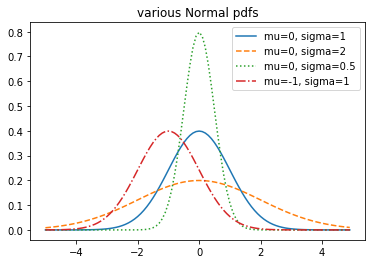

In [8]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs , [normal_pdf(x, sigma=1) for x in xs], 
          '-', label='mu=0, sigma=1')
plt.plot(xs , [normal_pdf(x, sigma=2) for x in xs], 
          '--', label='mu=0, sigma=2')
plt.plot(xs , [normal_pdf(x, sigma=0.5) for x in xs], 
          ':', label='mu=0, sigma=0.5')
plt.plot(xs , [normal_pdf(x, mu=-1) for x in xs], 
          '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('various Normal pdfs')

In [10]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

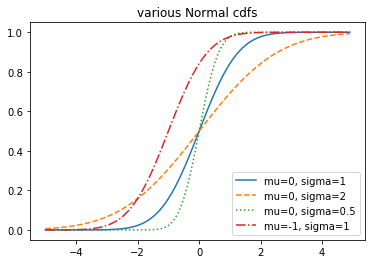

In [11]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs , [normal_cdf(x, sigma=1) for x in xs], 
          '-', label='mu=0, sigma=1')
plt.plot(xs , [normal_cdf(x, sigma=2) for x in xs], 
          '--', label='mu=0, sigma=2')
plt.plot(xs , [normal_cdf(x, sigma=0.5) for x in xs], 
          ':', label='mu=0, sigma=0.5')
plt.plot(xs , [normal_cdf(x, mu=-1) for x in xs], 
          '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title('various Normal cdfs')
plt.show()

In [13]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma *\
                    inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (hi_z + low_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
            if mid_p < p:
                low_z = mid_z
            elif mid_p > p:
                hi_z = mid_z
            else:
                break
    return mid_z

In [15]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    
    data= [binomial(n,p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x -0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8, 
            color ='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma)
          - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial Distribution vs Normal Approximation')
    plt.show()

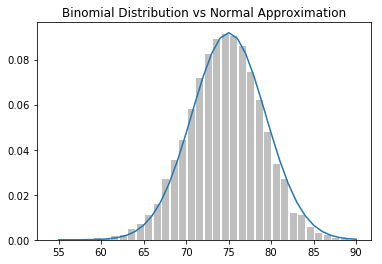

In [18]:
make_hist(0.75, 100, 10000)